With the information getting polarized on social media, it is natural to think if it affects our mental health in real life as well. In this tutorial, we explore the correlation of mental health with  social media usage using Python and GridDB. The outline of the tutorial will be as follows:

1. Prerequisites and Environment Set up
2. About the Dataset
3. Importing the libraries
4. Reading the data
5. Exploratory Data Analysis
6. Data Transformation
7. What is GridDB?
8. Inserting and Reading data from GridDB
9. Basic Data Visualization
10. Quantifying the mental health
11. Correlation between mental health and social media usage
12. Conclusion
13. References

## 1. Prerequisites and Environment Set up

### 1.1 Python Libraries

This tutorial has been executed in Jupyter Notebook with Python version 3.8.3 on a Windows 10 Operating System. The following libraries will be required before the code execution:

1. [Pandas](https://pandas.pydata.org/docs/getting_started/install.html)
2. [Numpy](https://numpy.org/install/)
3. [Matplotlib](https://matplotlib.org/stable/users/installing/index.html)
4. [Seaborn](https://seaborn.pydata.org/installing.html)

The easiest way to install these packages in your environment is via ```pip install <package-name>``` or ```conda install <package-name>``` if you are using Anaconda Navigator. Alternatively, refer to the documentation of these packages for detailed information

### 1.2 GridDB Libraries

Additionally, if you want to read your data from GridDB to directly in Python. The following libraries need to be installed:

1. [GridDB C-client](https://github.com/griddb/c_client)
2. SWIG (Simplified Wrapper and Interface Generator)
3. [GridDB Python Client](https://github.com/griddb/python_client)

GridDB python-client makes it easier to load the data into your python environment without any hassle of downloading it first into a CSV format. 

Great! Now that we have installed the necessary libraries, let's have a look at the dataset. 

## 2. About the Dataset

The dataset used for this tutorial intends to find a correlation (if any) between the time spent on social media by an individual and how their mental health gets affected by it. The dataset is open-source and can be downloaded from [Kaggle](https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health/data). 

The dataset has different columns recording an individual's personal information such as age, gender, occupation, along with questions about social media usage, mental health status, etc. In total, there are 481 instances (or rows) and 20 such attributes (or columns). 

Let's import the libraries and have a look at our dataset

## 3. Importing the libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The cell will not return anything if the execution is successful. If you encounter an error, kindly check if the packages are correctly installed and are compatible with each other.

After importing the libraries, let's go ahead and load our dataset

## 4. Reading the data 

In [65]:
data=pd.read_csv('social_media.csv')

Now that our data is successfully loaded in the environment, let's have a look at some basic features. We'll begin with the size of the dataset and how it looks!

In [66]:
data.shape

(481, 21)

As mentioned before, there are 481 rows and 21 columns. Let's see what that looks like.

In [67]:
data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


The <code>head()</code> function displays the first five rows of the dataset. As we can see, the column names are really long with spaces between them. Usually, it's a good idea to have shorter column names with minimal or no spacing to avoid typing errors later on. 

Therefore, we'll rename some of the columns.

##  5. Exploratory Data Analysis (EDA)

### 5.1 Renaming the columns

In [68]:
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Sex','3. Relationship Status':'Relationship_Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social_Media_User',
                       '7. What social media platforms do you commonly use?':'Platforms_Used',
                       '8. What is the average time you spend on social media every day?':'Time_Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD_Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD_Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety_Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD_Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety_Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD_Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self_Esteem_Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self_Esteem_Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self_Esteem_Q3',
                       '18. How often do you feel depressed or down?':'Depression_Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression_Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression_Q3' },inplace=True)

We have tried to keep the column names upto 2 words and replaced the space with an underscore. Let's see how our updated dataframe looks like.

In [69]:
data.head()

,Timestamp,Age,Sex,Relationship_Status,Occupation,Affiliations,Social_Media_User,Platforms_Used,Time_Spent,ADHD_Q1,...,Anxiety_Q1,ADHD_Q3,Anxiety_Q2,ADHD_Q4,Self_Esteem_Q1,Self_Esteem_Q2,Self_Esteem_Q3,Depression_Q1,Depression_Q2,Depression_Q3
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


Looks good! Next up, we'll check if our data has any null values. This is an important step to avoid any inconsistencies in the future, especially when performing numerical operations.

### 5.2 Dealing with missing values

In [70]:
data.isna().sum()

Timestamp               0
Age                     0
Sex                     0
Relationship_Status     0
Occupation              0
Affiliations           30
Social_Media_User       0
Platforms_Used          0
Time_Spent              0
ADHD_Q1                 0
ADHD_Q2                 0
Anxiety_Q1              0
ADHD_Q3                 0
Anxiety_Q2              0
ADHD_Q4                 0
Self_Esteem_Q1          0
Self_Esteem_Q2          0
Self_Esteem_Q3          0
Depression_Q1           0
Depression_Q2           0
Depression_Q3           0
dtype: int64

All the columns look good except for <code>Affiliations</code>. Since we have a column called <code>Occupation</code>, there is not much need of <code>Affiliations</code> in this tutorial. We'll just drop the column.

In [71]:
data = data.drop("Affiliations", axis=1)
data.isna().sum()

Timestamp              0
Age                    0
Sex                    0
Relationship_Status    0
Occupation             0
Social_Media_User      0
Platforms_Used         0
Time_Spent             0
ADHD_Q1                0
ADHD_Q2                0
Anxiety_Q1             0
ADHD_Q3                0
Anxiety_Q2             0
ADHD_Q4                0
Self_Esteem_Q1         0
Self_Esteem_Q2         0
Self_Esteem_Q3         0
Depression_Q1          0
Depression_Q2          0
Depression_Q3          0
dtype: int64

Let's have a look at the dimension of the dataframe just to make sure everything is working as expected.

In [72]:
data.shape

(481, 20)

Okay. We're done with all the fundamental checks. It's time to check each attribute individually such as their data types.

## 6. Data Transformation

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            481 non-null    object 
 1   Age                  481 non-null    float64
 2   Sex                  481 non-null    object 
 3   Relationship_Status  481 non-null    object 
 4   Occupation           481 non-null    object 
 5   Social_Media_User    481 non-null    object 
 6   Platforms_Used       481 non-null    object 
 7   Time_Spent           481 non-null    object 
 8   ADHD_Q1              481 non-null    int64  
 9   ADHD_Q2              481 non-null    int64  
 10  Anxiety_Q1           481 non-null    int64  
 11  ADHD_Q3              481 non-null    int64  
 12  Anxiety_Q2           481 non-null    int64  
 13  ADHD_Q4              481 non-null    int64  
 14  Self_Esteem_Q1       481 non-null    int64  
 15  Self_Esteem_Q2       481 non-null    int

We can see that the <code>Age</code> column is float. However, it should be an integer value. Let's change that.

### 6.1 Age

In [74]:
data['Age'] = data['Age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            481 non-null    object
 1   Age                  481 non-null    int32 
 2   Sex                  481 non-null    object
 3   Relationship_Status  481 non-null    object
 4   Occupation           481 non-null    object
 5   Social_Media_User    481 non-null    object
 6   Platforms_Used       481 non-null    object
 7   Time_Spent           481 non-null    object
 8   ADHD_Q1              481 non-null    int64 
 9   ADHD_Q2              481 non-null    int64 
 10  Anxiety_Q1           481 non-null    int64 
 11  ADHD_Q3              481 non-null    int64 
 12  Anxiety_Q2           481 non-null    int64 
 13  ADHD_Q4              481 non-null    int64 
 14  Self_Esteem_Q1       481 non-null    int64 
 15  Self_Esteem_Q2       481 non-null    int64 
 16  Self_Est

Next up, we'll check the <code>Sex</code> column to see what all values it can take.

### 6.2 Gender

In [75]:
print(set(data['Sex']))

{'unsure ', 'There are others???', 'Trans', 'NB', 'Non-binary', 'Male', 'Nonbinary ', 'Non binary ', 'Female'}


The values such as <code>There are others???</code> and <code>unsure</code> are ambiguous. Hence, it's  better to drop those rows.

In [76]:
data.drop(data.loc[(data['Sex'] == 'There are others???') | (data['Sex'] == 'unsure ')].index, inplace=True)
print(set(data['Sex']))

{'Trans', 'NB', 'Non-binary', 'Male', 'Nonbinary ', 'Non binary ', 'Female'}


Also, <code>Non-binary, Nonbinary, NB, Non binary </code> all signify the same value. We'll replace all these with the same value.

In [77]:
data.replace('Non-binary','Nonbinary', inplace=True)
data.replace('NB','Nonbinary', inplace=True)
data.replace('Non binary ','Nonbinary', inplace=True)
data.replace('Nonbinary ','Nonbinary', inplace=True)
print(set(data['Sex']))

{'Male', 'Nonbinary', 'Trans', 'Female'}


Now that we've fixed the <code>Age</code> and <code>Sex</code> column, let's have a look at other columns having string values.

### 6.3 Other categorical attributes

In [78]:
print(set(data['Relationship_Status']))
print(set(data['Occupation']))
print(set(data['Social_Media_User']))
print(set(data['Time_Spent']))

{'Divorced', 'Married', 'Single', 'In a relationship'}
{'School Student', 'University Student', 'Salaried Worker', 'Retired'}
{'No', 'Yes'}
{'Less than an Hour', 'More than 5 hours', 'Between 4 and 5 hours', 'Between 2 and 3 hours', 'Between 3 and 4 hours', 'Between 1 and 2 hours'}


In [79]:
data.head()

,Timestamp,Age,Sex,Relationship_Status,Occupation,Social_Media_User,Platforms_Used,Time_Spent,ADHD_Q1,ADHD_Q2,Anxiety_Q1,ADHD_Q3,Anxiety_Q2,ADHD_Q4,Self_Esteem_Q1,Self_Esteem_Q2,Self_Esteem_Q3,Depression_Q1,Depression_Q2,Depression_Q3
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


Great! Everything looks good. We shall now create a GridDB container for data insertion. But first, what is GridDB and why do we need it?

## 7. What is GridDB?

[GridDB](https://griddb.net/) is a powerful and scalable database that can handle large amounts of data quickly and efficiently. It is designed to store both metadata and time series data. GridDB is also in-memory, which means that it stores the data in RAM for even faster access.

But why do we need GridDB?

### 7.1 Why do we need GridDB?

Before answering why GridDB, let's first understand why do we need any database in the first place? 

We need databases to organize large amounts of data. While you can store the same data in perhaps, a CSV file, but there are certain challenges that come with it. To start with, databases ensure consistency and integrity. For instance, you have a team of 5 people. With a database, you don't need to worry about one person updating the database and the other person not seeing the change. Moreover, because a database has certain restrictions, only the allowed users can make changes to it. 

On the other hand, if a CSV file is locally stored, you might end up with different versions after analysing it or  making changes to it. Hence, it is not coherent. This becomes specially important when dealing with huge amount of data in an organization.

Since, GridDB is an efficient database that ensures faster access because of its in-memory architecture, it's a good choice when dealing with Big Data.

Let's go ahead and create a GridDB container for data insertion.

## 8. Inserting and Reading Data from GridDB

GridDB has a <code>python-client</code> which makes it easier to manipulate the data using python. But first, we need to create a connection. After the connection is successful, we'll define our container.

### 8.1 Creating a connection 

The code for container creation looks as follows:

In [ ]:
import griddb_python as griddb

factory = griddb.StoreFactory.get_instance()
host = "127.0.0.1:10001"
cluster = "myCluster"
db_user = "admin"
db_password = "admin"

try:
    gridstore = factory.get_store(notification_member=host, cluster_name=cluster, username=db_user, password=db_password)
    print("connection successful")
    
except griddb.GSException as e:
    for i in range(e.get_error_stack_size()):
        print("[",i,"]")
        print(e.get_error_code(i))
        print(e.get_location(i))
        print(e.get_message(i))

<img src="connection.png" alt="Alternative text" />

If the above code results in an error, try checking if you started the node with <code>gs_startnode -u username/password -w</code>. For more information on installation and getting started, check the official [GridDB guide](https://www.toshiba-sol.co.jp/en/pro/griddb/docs-en/v4_3_2/GridDB_QuickStartGuide.html').

The code is not completed yet. After establishing a connection, we need to define our container. Hence, the complete code looks like:

### 8.2 Defining and creating the container

In [ ]:
import griddb_python as griddb

factory = griddb.StoreFactory.get_instance()
host = "127.0.0.1:10001"
cluster = "myCluster"
db_user = "admin"
db_password = "admin"

try:
    gridstore = factory.get_store(notification_member=host, cluster_name=cluster, username=db_user, password=db_password)
    print("connection successful")
    
    #defining the container structure 
    conInfo = griddb.ContainerInfo(name="social_media",
                    column_info_list = [["Timestamp", griddb.Type.STRING],
                                        ["Age", griddb.Type.INTEGER],
                                        ["Sex", griddb.Type.STRING],
                                        ["Relationship_Status", griddb.Type.STRING],
                                        ["Occupation", griddb.Type.STRING],
                                        ["Social_Media_User", griddb.Type.STRING],
                                        ["Platforms_Used", griddb.Type.STRING],
                                        ["Time_Spent", griddb.Type.STRING],
                                        ["ADHD_Q1", griddb.Type.INTEGER],
                                        ["ADHD_Q2", griddb.Type.INTEGER],
                                        ["Anxiety_Q1", griddb.Type.INTEGER],
                                        ["ADHD_Q3", griddb.Type.INTEGER],
                                        ["Anxiety_Q2", griddb.Type.INTEGER],
                                        ["ADHD_Q4", griddb.Type.INTEGER],
                                        ["Self_Esteem_Q1", griddb.Type.INTEGER],
                                        ["Self_Esteem_Q2", griddb.Type.INTEGER],
                                        ["Self_Esteem_Q3", griddb.Type.INTEGER],
                                        ["Depression_Q1",griddb.Type.INTEGER],
                                        ["Depression_Q2",griddb.Type.INTEGER],
                                        ["Depression_Q3",griddb.Type.INTEGER]],
                    type=griddb.ContainerType.COLLECTION)

    print(conInfo)

    social_media_container = gridstore.put_container(conInfo)
    print("container creation successful")

    social_media_container.put_rows(data)

    print("data insertion successful")


except griddb.GSException as e:
    for i in range(e.get_error_stack_size()):
        print("[",i,"]")
        print(e.get_error_code(i))
        print(e.get_location(i))
        print(e.get_message(i))

<img src="data_insertion.png" alt="Alternative text" />

### 8.3 Few things to note

During the data insertion, I encountered a couple of errors. Here are some things to keep in mind to avoid this situation:

- The order of the schema is quite important and it should match with the columns of your dataframe. If the above code results in an error, remove the index and try again.

- Insertion could result in an <code>[1008:CM_LIMITS_EXCEEDED]</code> error. For me, it got resolved by removing the special characters and spaces from column names. 

- If your container type is <code>TIMESERIES</code>, then a <code>ROWKEY</code> must be defined. A <code>ROWKEY</code> is a primary key for your dataset. It is not need if the container type is <code>COLLECTION</code> which is the case for this dataset. 

- A <code>ROWKEY</code> is either a STRING, INTEGER, LONG or TIMESTAMP column. If you do not specify a ROWKEY column, then it takes the first column as the default ROWKEY. If your first column is not from those datatypes, then it would throw an <code>[140009:CC_UNSUPPORTED_KEY_TYPE]</code>. 

### 8.4 Reading data from GridDB

Reading the data from GridDB is also quite simple and easy to understand. The first step is the same - to establish a connection. After that is done, we need to call the container we just created. Look at the code below:

In [ ]:
import griddb_python as griddb
print("import successful")

factory = griddb.StoreFactory.get_instance()

host = "127.0.0.1:10001"
cluster = "myCluster"
db_user = "admin"
db_password = "admin"


try:
        gridstore = factory.get_store(notification_member=host, cluster_name=cluster, username=db_user, password=db_password)
        cont = gridstore.get_container("social_media")
        if cont is None:
            print("Does not exist")
        print("connection successful")

        query = cont.query("select *")
        rs = query.fetch(False)
        data = rs.fetch_rows()
        print(type(data))
        print(data.head())

except griddb.GSException as e:
    
    for i in range(e.get_error_stack_size()):
        print("[",i,"]")
        print(e.get_error_code(i))
        print(e.get_location(i))
        print(e.get_message(i))

<img src="data_read.png" alt="Alternative text" />

## 9. Basic Data Visualization

Now that we've learnt how to load the data using both Pandas and GridDB, it's time to visualize our data.

We'll first write a function to display text on top of each bin.  

In [32]:
def display_text(ax):
    total=float(len(data))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2,height+2,'{0:.0%}'.format(height/total),ha="center")

### 9.1 Distribution by gender

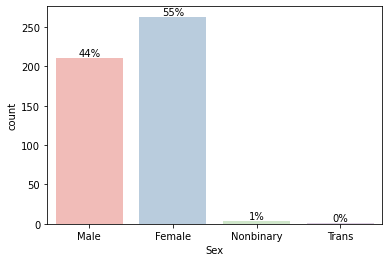

In [11]:
ax = sns.countplot(x="Sex", data=data, palette='Pastel1') 
display_text(ax)

### 9.2 Distribution by Time spent

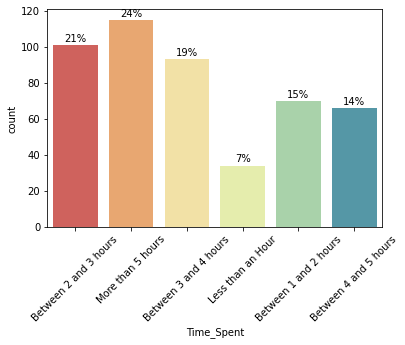

In [12]:
ax = sns.countplot(x="Time_Spent", data=data, palette='Spectral')
plt.xticks(rotation=45)
display_text(ax)

### 9.3 Distribution by Occupation

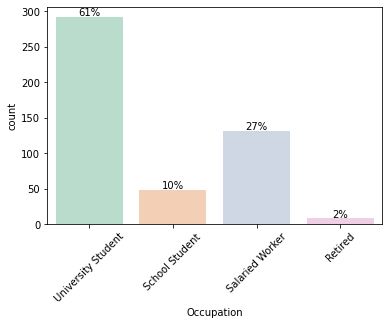

In [13]:
ax = sns.countplot(x="Occupation", data=data, palette='Pastel2') 
plt.xticks(rotation=45)
display_text(ax)

To calculate the correlation between social media usage and its affect on mental health, there should be a way to quantify the score for mental health where a higher score indicates serious mental health issues. Let's see how can we do that.

## 10. Quantifying the mental health

### 10.1 Fixing the Self-esteem column

In the <code>Self_Esteem_Q2</code> column, a higher score implies higher self-esteem which negatively relates to mental health issues. Therefore, we'll reverse the order since we are mapping higher score to serious mental health problems.

As we're interested in knowing if social media negatively impacts an individual's mental health, we'll equate the higher self-esteem values to 0. 

In [49]:
#Indicating positive self-esteem
data.loc[data['Self_Esteem_Q2'] == 3, 'Self_Esteem_Q2'] = 0
data.loc[data['Self_Esteem_Q2'] == 4, 'Self_Esteem_Q2'] = 0
data.loc[data['Self_Esteem_Q2'] == 5, 'Self_Esteem_Q2'] = 0
#Indicating low self-esteem
data.loc[data['Self_Esteem_Q2'] == 1, 'Self_Esteem_Q2'] = 4
data.loc[data['Self_Esteem_Q2'] == 2, 'Self_Esteem_Q2'] = 2

In [34]:
data.head()

,Timestamp,Age,Sex,Relationship_Status,Occupation,Social_Media_User,Platforms_Used,Time_Spent,ADHD_Q1,ADHD_Q2,Anxiety_Q1,ADHD_Q3,Anxiety_Q2,ADHD_Q4,Self_Esteem_Q1,Self_Esteem_Q2,Self_Esteem_Q3,Depression_Q1,Depression_Q2,Depression_Q3
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,0,2,5,4,5
1,4/18/2022 19:19:28,21,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,4,1,5,4,5
2,4/18/2022 19:25:59,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,0,1,4,2,5
3,4/18/2022 19:29:43,21,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,4,2,4,3,2
4,4/18/2022 19:33:31,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,0,3,4,4,1


Earlier, we mentioned that we need to quantify the mental health factor. One way is to add up the scores of all ADHD, Anxiety, Self-esteem, and Depression questions. If the total score passes a certain threshold, we can say that the person is experiencing serious mental health issues.

### 10.2 Adding a new column

In [50]:
Total = ['ADHD_Q1', 'ADHD_Q2', 'ADHD_Q3', 'ADHD_Q4', 'Anxiety_Q1', 'Anxiety_Q2', 'Self_Esteem_Q1', 'Self_Esteem_Q2','Self_Esteem_Q3', 'Depression_Q1', 'Depression_Q2','Depression_Q3']
data['Total_Score'] = data[Total].sum(axis=1)
data = data.drop(Total+['Timestamp'], axis=1)

We dropped the individual question columns along with the <code>Timestamp</code> column because it is no longer needed. The updated dataset looks as follows:

In [36]:
data.head()

,Age,Sex,Relationship_Status,Occupation,Social_Media_User,Platforms_Used,Time_Spent,Total_Score
0,21,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,40
1,21,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,46
2,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,32
3,21,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,38
4,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,41


Next up, we need to decide the threshold score. The highest score that can be attained is 59. As a general rule, we can say if someone scores 60% or higher, they can come under the category of serious mental health issues. Therefore, we have set the threshold to be 35.

In [51]:
def map_score(score):
  if score < 35:
    return "0"
  elif score >= 35:
    return "1"

data['Is_serious']= data['Total_Score'].apply(lambda score: map_score(score))
data['Is_serious'] = data['Is_serious'].astype(int)

Let's have a look at our updated data.

In [17]:
data.head()

,Age,Sex,Relationship_Status,Occupation,Social_Media_User,Platforms_Used,Time_Spent,Total Score,Is_serious
0,21,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,40,1
1,21,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,46,1
2,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,32,0
3,21,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,38,1
4,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,41,1


We can also see the distribution using a countplot.

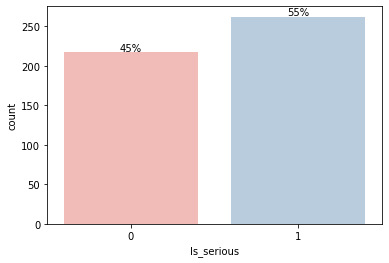

In [52]:
ax = sns.countplot(x="Is_serious", data=data, palette='Pastel1') 
display_text(ax)

The above graph tells us that 37% of total people who participated in the survey are facing serious mental health issues. The next question is - is it because of social media?

## 11. Correlation between social media usage and mental health score

We only have one numerical column - <code>Age</code> to match with the </code>Is_serious</code> column. Other columns are categorical, hence we can't plot a pairplot. First, we need to convert them to numerical values.

### 11.2 Converting the Gender column

In [53]:
data.loc[data['Sex'] == 'Male', 'Sex'] = 0
data.loc[data['Sex'] == 'Female', 'Sex'] = 1
data.loc[data['Sex'] == 'Nonbinary', 'Sex'] = 2
data.loc[data['Sex'] == 'Trans', 'Sex'] = 2
data['Sex'] = data['Sex'].astype(int)

### 11.3 Converting the Time spent column

In [60]:
data.loc[data['Time_Spent'] == 'Less than an Hour', 'Time_Spent'] = 0
data.loc[data['Time_Spent'] == 'Between 1 and 2 hours', 'Time_Spent'] = 1
data.loc[data['Time_Spent'] == 'Between 2 and 3 hours', 'Time_Spent'] = 2
data.loc[data['Time_Spent'] == 'Between 3 and 4 hours', 'Time_Spent'] = 3
data.loc[data['Time_Spent'] == 'Between 4 and 5 hours', 'Time_Spent'] = 4
data.loc[data['Time_Spent'] == 'More than 5 hours', 'Time_Spent'] = 5
data['Time_Spent'] = data['Time_Spent'].astype(int)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 0 to 480
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  479 non-null    int32 
 1   Sex                  479 non-null    int32 
 2   Relationship_Status  479 non-null    object
 3   Occupation           479 non-null    object
 4   Social_Media_User    479 non-null    object
 5   Platforms_Used       479 non-null    object
 6   Time_Spent           479 non-null    int32 
 7   Total_Score          479 non-null    int64 
 8   Is_serious           479 non-null    int32 
dtypes: int32(4), int64(1), object(4)
memory usage: 49.9+ KB


### 11.4 Plotting correlation

In [62]:
data.corr()

,Age,Sex,Time_Spent,Total_Score,Is_serious
Age,1.000000,-0.130833,-0.360503,-0.306462,-0.265499
Sex,-0.130833,1.000000,0.213539,0.148202,0.127479
Time_Spent,-0.360503,0.213539,1.000000,0.444768,0.392661
Total_Score,-0.306462,0.148202,0.444768,1.000000,0.817281
Is_serious,-0.265499,0.127479,0.392661,0.817281,1.000000


As we can see, time spent on social media weakly correlates with the <code>Total_Score</code> and <code>Is_serious</code> with a value of <code>0.44</code> and <code>0.39</code> respectively. 

Moreover, time spent and age are negatively correlated indicating the higher the age, less the time spent on social media, and hence, less the total score.

Since this is a weak correlation, we cannot conclude this result for sure. There could be other underlying factors causing the mental health of an individual to be affected negatively.

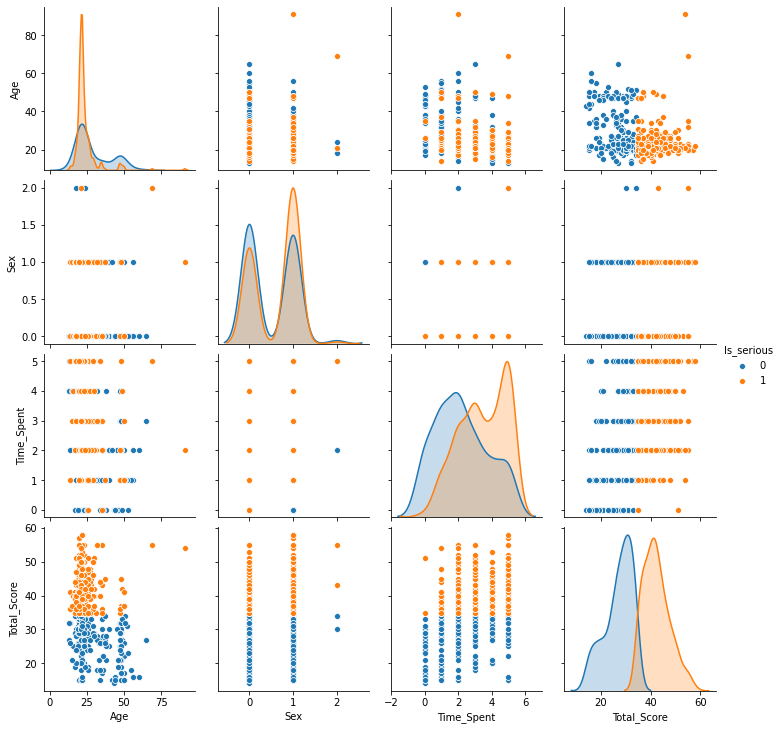

In [56]:
sns.pairplot(data,hue='Is_serious',diag_kind='kde')

The pairplot between different columns shows a clear segmentation in some. However, in most of the plots, the blue and orange dots are overlapping, indicating we can't separate the two kinds of individuals from this alone.

## 11. Conclusion

In this tutorial, we plotted the correlation between time spent on social media and the individual's mental health. We first began by importing the data and preprocessing it. We also learnt how to use GridDB for data insertion and extraction. This is useful when working with large amounts of data.

After successfully reading the data from GridDB, we made our way to Data Visualization. We saw individual factor distribution. Later on, we plotted these factors with the total mental health score. We concluded that there is a weak positive correlation between time spent on social media and the total score of an indiviual. We also saw that age negatively correlates with time spent online.

## 12. References

1. https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health
2. https://www.kaggle.com/code/souvikahmed071/correlation-between-sm-and-mental-health